<a href="https://colab.research.google.com/github/DomCastaneda/California-Housing-Prices-Data-Anaylsis/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split


%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DomCastaneda/CPSC-392-Data-Set/main/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.dropna(inplace = True)
ocean_proximity_dummies = pd.get_dummies(pd.concat([df['ocean_proximity'],df['ocean_proximity']]),
                                         drop_first=True)
dummies_names=list(ocean_proximity_dummies.columns)
df=pd.concat([df,ocean_proximity_dummies[:df.shape[0]]], axis=1 )

df_dummies=df.drop(['ocean_proximity'], axis=1)
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


# Q1

In [ ]:
predictors = ["housing_median_age", "total_rooms", "total_bedrooms", "median_house_value", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors], df_dummies["median_income"], test_size = 0.2, random_state = 10)

z = StandardScaler()
zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr = LinearRegression()
lr.fit(zX_train, y_train)

y_pred = lr.predict(zX_test)

print("Predicting income of a household with all chosen predictors")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

true_vs_pred = pd.DataFrame({"Predicted Values": y_pred, 
                          "Actual Values": y_test})

coefficients = pd.DataFrame({"Coef": lr.coef_,
                            "Predictors": predictors})

Predicting income of a household with all chosen predictors
mae training set 0.7536868696517735
mae test set 0.7482907621798722
r2 training set 0.6630667498123217
r2 test set 0.6575316108797203


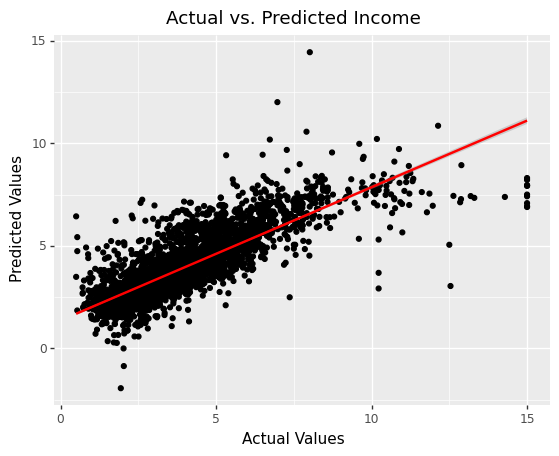

<ggplot: (8763522081141)>

In [ ]:
(ggplot(true_vs_pred, aes(x = "Actual Values", y = "Predicted Values")) + geom_point() + geom_smooth(method = "lm", color = "red") + labs(title = "Actual vs. Predicted Income"))

## Graph Analysis

The graph's points are following the regression line which indicates the model is decently capable of predicting median_income with the given predictor variables. The scatter plot indicates heteroskedasticity which means the variance of the error is not constant across the various levels of the dependent variable (shown at Actual Values 8-10). This means the standard errors of the coefficients could be unreliable. The variation of points from Actual Values 10-15 shows the graph underestimating the outcome because the actual values are larger than the predicted values. This model seems to only be reliable from Actual Values 0-10 where the predicted values have a close deviation with the actual values.

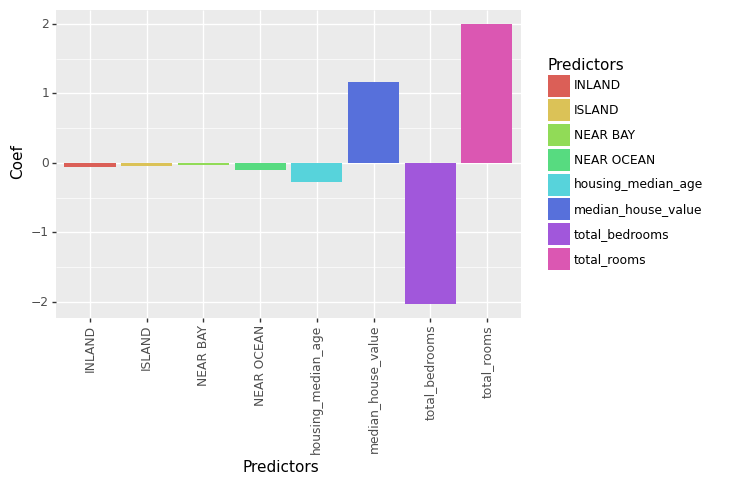

<ggplot: (8763521948757)>

In [ ]:
(ggplot(coefficients, aes(x = "Predictors", y = "Coef", fill = "Predictors")) + geom_bar(stat = "identity") + theme(figure_size=(6, 4), axis_text_x=element_text(rotation=90)))

## Graph Analysis

This coef bar chart tells us about the relationship between each predictor and median_income. median_house_value and total_rooms have a positive relationship with median_income. It seems that total_rooms has the greatest impact on predicting median_income since it has the largest coef value. INLAND, ISLAND, NEAR BAY, NEAR OCEAN, housing_median_age, and total_bedrooms have negative relationships with median_income. total_bedrooms will have a large impact the prediction of median_income but has a negative relationship. The only predictors that have a noticeable impact on predicting median_income are NEAR OCEAN, housing_median_age, median_house_value, total_bedrooms, and total_rooms.

## Q1 Analysis

The r2 value of the test set is 0.6575 and the r2 value of the train set is 0.6631. This means that the model is doing slightly better on the train set which could signify overfitting - this model does better on data it has seen compared to data it hasn't seen. An r2 score of 0.6575 means the linear model explains 65% of the variation of our data. This indicates a medium relationship between our predictors and median_income. The MAE of the test set is 0.7483 and the MAE of the train set is 0.7537. This means the model on average was 0.7483 off for test data. Relatively, the model seems to be doing well since the MAE is very low. The model is doing pretty well at predicting median_income based off our r2 and MAE scores but the r2 value could be improved.

# Q2

In [ ]:
all_predictors = ["housing_median_age", "total_rooms", "median_income", "total_bedrooms", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[all_predictors], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values With All Chosen Predictors")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values With All Chosen Predictors
mae training set 52209.805253585604
mae test set 52306.00757480986
r2 training set 0.6145304644044163
r2 test set 0.6056194257129548


In [ ]:
coefficients = pd.DataFrame({"Coef": lr.coef_,
                            "Predictors": all_predictors})

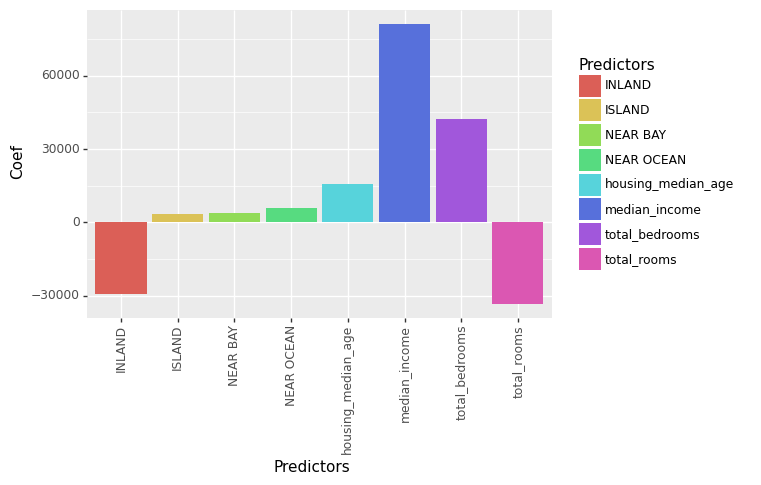

<ggplot: (8763521954525)>

In [ ]:
(ggplot(coefficients, aes(x = "Predictors", y = "Coef", fill = "Predictors")) + geom_bar(stat = "identity") + theme(figure_size=(6, 4), axis_text_x=element_text(rotation=90)))

## Graph Analysis

This coef bar chart tells us about the relationship between each predictor and median_house_value. ISLAND, NEAR BAY, NEAR OCEAN, housing_median_age, median_income and total_bedrooms have a positive relationship with median_house_value. It seems that median_income has the greatest impact on predicting median_house_value since it has the largest coef value. INLAND and total_rooms have negative relationships with median_house_value. As houses are inland, the median_house_value decreases in value. It suprised me that as total_rooms increased, median_house_value also decreased. As housing_median_age, median_income and total_bedrooms increases, the house value will increase. The only predictors that have a noticeable impact on predicting median_house_value are INLAND, median_income, total_bedrooms and total_rooms.

In [ ]:
predictors_total_bedrooms = ["housing_median_age", "total_rooms", "median_income", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_total_bedrooms], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without total_bedrooms")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without total_bedrooms
mae training set 53215.27882597227
mae test set 53409.44641492155
r2 training set 0.6024669225471986
r2 test set 0.5929851034817557


In [ ]:
predictors_total_rooms = ["housing_median_age", "total_bedrooms", "median_income", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_total_rooms], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without total_rooms")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without total_rooms
mae training set 52856.47004878958
mae test set 53100.55757598656
r2 training set 0.6074059582425362
r2 test set 0.5973946982565261


In [ ]:
predictors_housing_median_age = ["total_rooms", "total_bedrooms", "median_income", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_housing_median_age], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without housing_median_age")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without housing_median_age
mae training set 52880.88792444343
mae test set 52790.60494842747
r2 training set 0.6005700310310194
r2 test set 0.5955060641274424


In [ ]:
predictors_INLAND = ["housing_median_age", "total_rooms", "total_bedrooms", "median_income", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_INLAND], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without INLAND")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without INLAND
mae training set 55751.06645065436
mae test set 55750.242335517185
r2 training set 0.5684069495403294
r2 test set 0.5583867452869036


In [ ]:
predictors_ISLAND = ["housing_median_age", "total_rooms", "total_bedrooms", "median_income", "INLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_ISLAND], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without ISLAND:")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without ISLAND:
mae training set 52260.40576949995
mae test set 52324.63944565744
r2 training set 0.6137585994081864
r2 test set 0.6056011786598925


In [ ]:
predictors_NEARBAY = ["housing_median_age", "total_rooms", "total_bedrooms", "median_income", "INLAND", "ISLAND", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_NEARBAY], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without NEAR BAY:")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without NEAR BAY:
mae training set 52341.86404414937
mae test set 52503.32497525443
r2 training set 0.6136058552476114
r2 test set 0.6045056998552405


In [ ]:
predictors_NEAROCEAN = ["housing_median_age", "total_rooms", "total_bedrooms", "median_income", "INLAND", "ISLAND", "NEAR BAY"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_NEAROCEAN], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without NEAR OCEAN:")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without NEAR OCEAN:
mae training set 52540.95958074028
mae test set 52618.19617788754
r2 training set 0.6122856575443052
r2 test set 0.6018644313232281


In [ ]:
predictors_median_income = ["housing_median_age", "total_rooms", "total_bedrooms", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

X_train, X_test, y_train, y_test = train_test_split(df_dummies[predictors_median_income], df_dummies["median_house_value"], test_size = 0.2, random_state = 10)

zX_train = z.fit_transform(X_train)
zX_test = z.transform(X_test)

lr.fit(zX_train, y_train)

print("Predicting House Values Without median_income:")
print("mae training set", mean_absolute_error(y_train, lr.predict(zX_train)))
print("mae test set", mean_absolute_error(y_test, lr.predict(zX_test)))
print("r2 training set", r2_score(y_train, lr.predict(zX_train)))
print("r2 test set", r2_score(y_test, lr.predict(zX_test)))

Predicting House Values Without median_income:
mae training set 71632.89124005368
mae test set 70996.42496352503
r2 training set 0.3224359908322161
r2 test set 0.3171975856160282


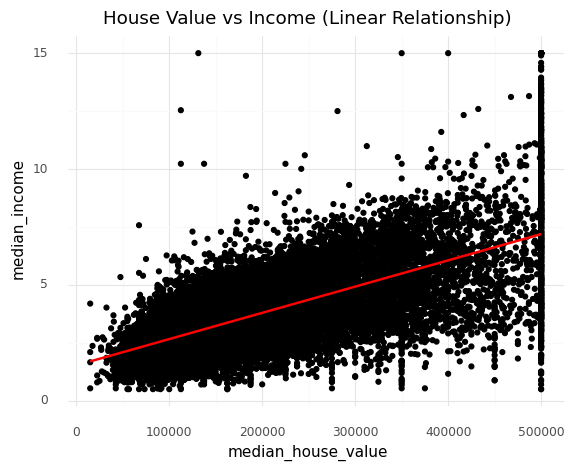

<ggplot: (8763522317289)>

In [ ]:
(ggplot(df_dummies, aes(x = "median_house_value", y = "median_income")) + geom_point() + geom_smooth(method = "lm", color = "red") +
labs(title = "House Value vs Income (Linear Relationship)") + theme_minimal())

## Graph Analysis

The graph follows a roughly linear pattern between the variables median_income and median_house_value. The scatter plot shows heteroskedasticity since there is an unequal scatter of points from median_house_value 40000 to 50000.

In [ ]:
assump = pd.DataFrame({"error": y_pred - y_test, "predicted": y_pred})

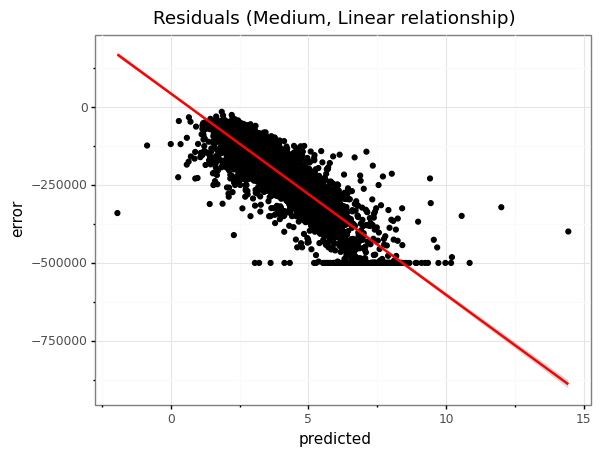

<ggplot: (8763523048969)>

In [ ]:
ggplot(assump, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + labs(title = "Residuals (Medium, Linear relationship)")

## Graph Analysis

The spread of the errors is not the same across the graph so this indicates heteroskedasticity. There is a linear trend in the negative direction toward predicted 15. The linearity most likely comes from the median_income predictor since the relationship between this variable and median_house_value is roughly linear. 

## Q2 Analysis

The original r2 score with all the predictors was 0.6145. The original MAE value with all predictors is 52209.

Removing total_bedrooms from the model dropped the r2 score to 0.6025 (0.012 decrease). Removing total_rooms from the model dropped the r2 score to 0.6074 (0.0071 decrease). Removing housing_median_age from the model dropped the r2 score to 0.6006 (0.0139 decrease). Removing INLAND from the model dropped the r2 score to 0.5685 (0.046 decrease). Removing ISLAND from the model dropped the r2 score to 0.6137 (0.0008 decrease). Removing NEAR BAY from the model dropped the r2 score to 0.6136 (0.0009 decrease). Removing NEAR OCEAN from the model dropped the r2 score to 0.6123 (0.0022 decrease). 

Removing total_bedrooms from the model increased the MAE score to 53215 (1006 increase). Removing total_rooms from the model increased the MAE score to 52856 (647 increase). Removing housing_meddian_age from the model increased the MAE score to 52880 (671 increase). Removing INLAND from the model increased the MAE score to 55751 (3542 increase). Removing ISLAND from the model increased the MAE score to 52260 (51 increase). Removing NEAR BAY from the model increased the MAE score to 52341 (132 increase). Removing NEAR OCEAN from the model increased the MAE score to 52540 (331 increase).

Removing median_income from the model dropped the r2 score to 0.3224 (0.2921 decrease) and increased MAE values to 71632 (19423 increase). median_income is responsible for a majority of the error because of its impact it has on the model, but it improves the r2 score. The fit for median_house_value is improved the most by the predictor median_income since it enhanced r2 and MAE scores. 

This tells us that for our data set house values are impacted the most by household income, the total number of rooms of the house and whether or not the house is inland.